# Spatial Analysis

SpatialTis provides a series of Spatial Anlaysis methods:

- **Find cell neighbors**
- **Neighbor dependent markers**

Cell type based analysis:

- Spatial Distribution*
- Spatial Heterogenenity*
- Hotspot Detection*
- Neighborhood Analyisis (Cell-Cell Interaction)

\* No need to compute neighbors information

**Markers based analysis**:

- **Spatial Enrichment Analysis (Markers spatial enrichemnt)**
- **Spatial Co-expression**
- **Spatial community detection**


In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import anndata as ad
data = ad.read_h5ad("../data/imc_data.h5ad")
data

AnnData object with n_obs × n_vars = 1776974 × 38
    obs: 'area', 'eccentricity', 'islet_id', 'centroid', 'image', 'case', 'slide', 'part', 'group', 'stage', 'cell_cat', 'cell_type'
    var: 'markers'

In [3]:
import spatialtis as st
import spatialtis.plotting as sp
from spatialtis import CONFIG

CONFIG.EXP_OBS = ["stage", "case", "part", "image"] 
CONFIG.CELL_TYPE_KEY = "cell_type" 
CONFIG.MARKER_KEY = "markers"
CONFIG.CENTROID_KEY = "centroid"

In [4]:
selected_markers=["INS","CD38","CD44","PCSK2","CD99","CD68","MPO","SLC2A1",
"CD20","AMY2A","CD3e","PPY","PIN","GCG","PDX1","SST","SYP","KRT19",
"CD45","FOXP3","CD45RA","CD8a","IAPP","NKX6-1","CD4","PTPRN","cCASP3"]

In [5]:
st.find_neighbors(data, expand=8)

Find neighbors ██████████ 100% 00:00|00:14


## Sptial enrichment analysis

This is very similar to neighborhood analysis, to profile the interaction between markers

In [8]:
st.spatial_enrichment_analysis(data, selected_markers=selected_markers)

Spatial enrichment analysis ██████████ 100% 00:00|13:05


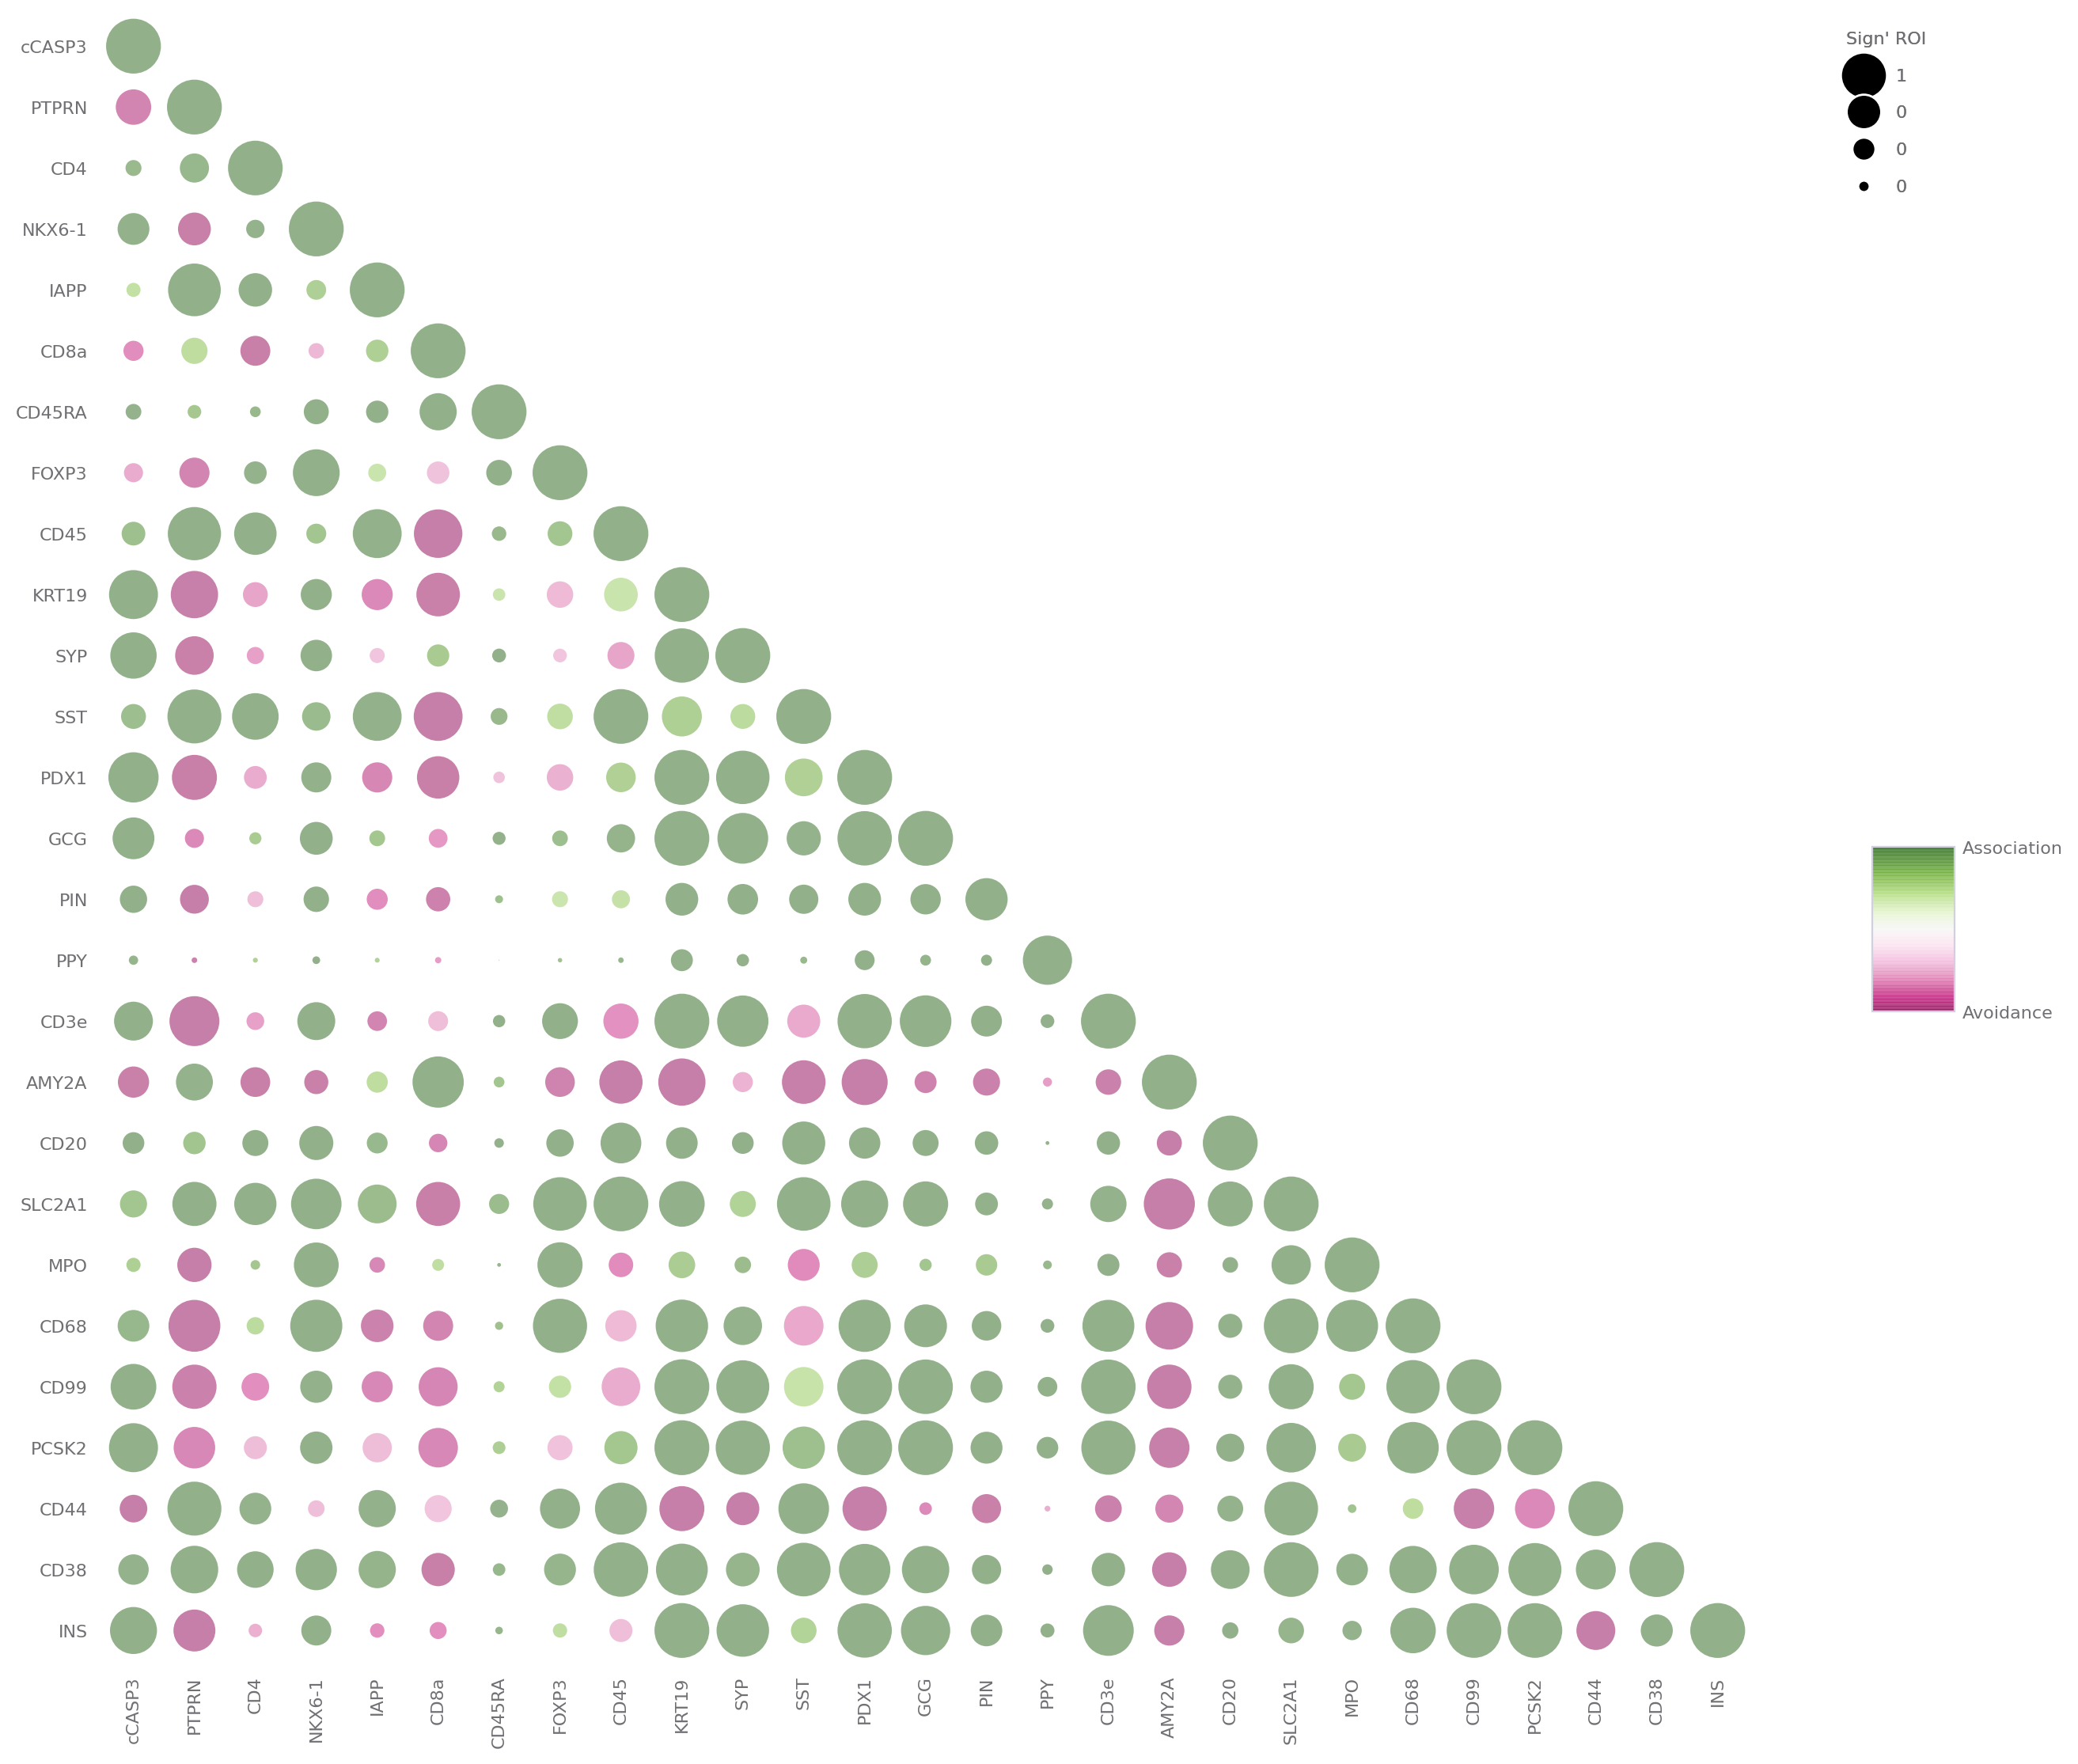

In [9]:
sp.spatial_enrichment_analysis(data)

## Spatial Co-expression

In [10]:
st.spatial_co_expression(data, selected_markers=selected_markers)

co-expression ██████████ 100% 00:00|00:07


In [35]:
st.get_result(data, 'co_expression')

,marker1,marker2,corr,pvalue
0,CD38,CD38,0.229734,0.000000e+00
1,CD38,CD44,0.080090,0.000000e+00
2,CD38,PCSK2,0.193848,0.000000e+00
3,CD38,CD99,0.090393,0.000000e+00
4,CD38,MPO,0.093435,0.000000e+00
5,CD38,PPY,0.051426,0.000000e+00
6,CD38,PIN,0.087710,0.000000e+00
7,CD38,SST,0.148793,0.000000e+00
8,CD38,KRT19,0.203678,0.000000e+00
9,CD38,PTPRN,0.105442,0.000000e+00


In [38]:
sp.spatial_co_expression(data, selected_markers=selected_markers, use="graph_interactive", layout="circular").render()

## Community detection

In [13]:
st.cell_community(data)

Communities detection ██████████ 100% 00:00|00:06


## Neighbor cell depedent markers

In [6]:
st.NCDMarkers(data, use_cell_type=True, selected_markers=selected_markers)

NCD Markers ██████████ 100% 00:00|00:18


In [7]:
st.get_result(data, 'ncd_markers')

,cell_type,marker,neighbor_type,dependency,log2_FC,pvalue
0,B,CD99,unknown,1.0,1.727045,1.316822e-29
1,B,SLC2A1,Tc,1.0,0.784838,8.404760e-07
2,B,FOXP3,Tc,1.0,5.688202,4.856840e-22
3,Tc,PCSK2,alpha,1.0,4.231225,5.131627e-79
4,Tc,CD99,beta,1.0,1.505686,3.858102e-09
...,...,...,...,...,...,...
83,unknown,PPY,gamma,1.0,5.310246,4.082054e-44
84,unknown,PIN,beta,1.0,4.551682,1.553997e-187
85,unknown,SST,beta,1.0,3.044656,3.754418e-169
86,unknown,KRT19,alpha,1.0,1.563142,0.000000e+00


In [27]:
df = st.get_result(data, 'ncd_markers')
df = df[(df['cell_type'] != "unknown") & (df['neighbor_type'] != "unknown")].reset_index(drop=True).sort_values('dependency')

In [28]:
df

,cell_type,marker,neighbor_type,dependency
0,B,PCSK2,Th,1.0
69,macrophage,KRT19,alpha,1.0
68,macrophage,SST,ductal,1.0
67,macrophage,PIN,alpha,1.0
66,macrophage,PPY,ductal,1.0
...,...,...,...,...
27,alpha,SST,beta,1.0
26,alpha,PIN,beta,1.0
25,alpha,PPY,gamma,1.0
47,ductal,SST,ductal,1.0


In [29]:
for t, g in df.groupby(['cell_type', 'neighbor_type']):
    print(t, g['marker'].values)

('B', 'B') ['PTPRN' 'PIN']
('B', 'Th') ['PCSK2']
('B', 'stromal') ['PPY']
('Tc', 'alpha') ['KRT19' 'PCSK2']
('Tc', 'beta') ['PIN' 'CD99']
('Tc', 'ductal') ['SST']
('Tc', 'endothelial') ['PPY']
('Th', 'alpha') ['KRT19' 'PIN' 'CD99' 'PCSK2']
('Th', 'ductal') ['PTPRN' 'SST']
('acinar', 'acinar') ['PTPRN']
('acinar', 'alpha') ['CD99' 'PCSK2' 'KRT19']
('acinar', 'beta') ['PIN']
('acinar', 'ductal') ['SST']
('acinar', 'gamma') ['PPY']
('alpha', 'acinar') ['CD99' 'KRT19']
('alpha', 'alpha') ['PCSK2']
('alpha', 'beta') ['SST' 'PIN']
('alpha', 'ductal') ['PTPRN']
('alpha', 'gamma') ['PPY']
('beta', 'acinar') ['CD99']
('beta', 'alpha') ['PCSK2']
('beta', 'beta') ['SST' 'PIN' 'PPY']
('beta', 'ductal') ['PTPRN']
('delta', 'alpha') ['PCSK2']
('delta', 'beta') ['SST' 'PIN']
('delta', 'delta') ['CD99']
('delta', 'ductal') ['PTPRN' 'KRT19']
('delta', 'gamma') ['PPY']
('ductal', 'acinar') ['PTPRN']
('ductal', 'alpha') ['KRT19' 'CD99' 'PCSK2']
('ductal', 'beta') ['PIN']
('ductal', 'ductal') ['SST']
('du

In [19]:
sp.NCDMarkers(data)

KeyError: "['corr'] not in index"

In [18]:
print("\n".join(df['marker'].unique()))

PCSK2
CD99
PPY
PIN
SST
KRT19
PTPRN


In [12]:
st.NMDMarkers(data, selected_markers=selected_markers, use_cell_type=True)

NMD Markers ██████████ 100% 00:00|10:38


In [13]:
st.get_result(data, 'nmd_markers')

,marker,neighbor_marker,dependency,corr,pvalue
0,CD38,CD44,0.233573,0.083108,0.0
1,CD44,CD44,0.571091,0.508253,0.0
2,PCSK2,PCSK2,0.581957,0.527866,0.0
3,CD99,CD99,0.824650,0.587406,0.0
4,MPO,MPO,0.200739,0.201208,0.0
5,PPY,PPY,0.309337,0.213360,0.0
6,PIN,PIN,0.525471,0.316015,0.0
7,SST,SST,0.694526,0.525266,0.0
8,KRT19,KRT19,0.837872,0.561561,0.0
9,PTPRN,PTPRN,0.586631,0.384555,0.0


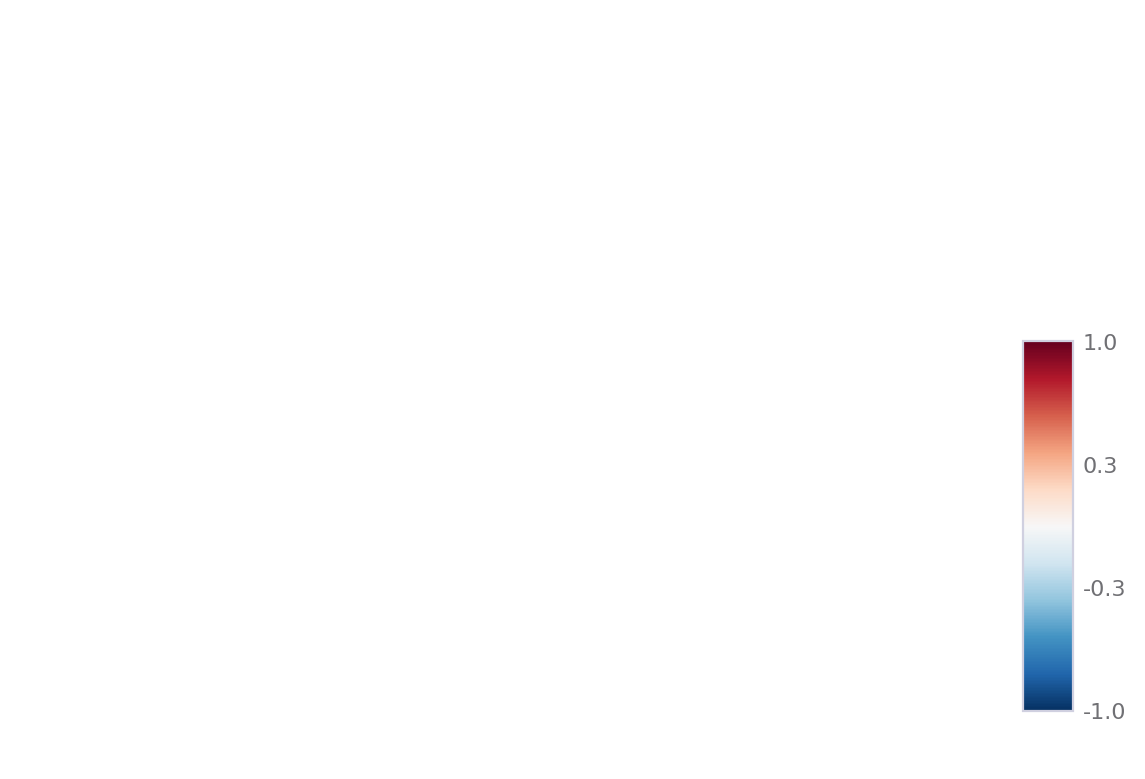

In [33]:
sp.NMDMarkers(data)